# Boundary Value Problem Example - Heated Rod
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

# Dirichlet Boundary Conditions

The coefficient matrix looks like
\begin{equation}
\left[ {\begin{array}{*{20}{c}}
1&0&0& \cdots &0\\
1& - \left( 2 + \Delta {x^2}H \right)&1&0& \vdots \\
0& \ddots & \ddots & \ddots &0\\
 \vdots &0&1& - \left( 2 + \Delta x^2H \right)&1\\
0& \cdots &0&0&1
\end{array}} \right]
\left( {\begin{array}{*{20}{c}}
T_1\\
\begin{array}{l}
T_2\\
T_3
\end{array}\\
\begin{array}{l}
 \vdots \\
 \vdots 
\end{array}\\
T_{n - 1}\\
T_n
\end{array}} \right) 
= \left( {\begin{array}{*{20}{c}}
T_\rm{left}\\
- T_\infty \Delta {x^2}H\\
 \vdots \\
- T_\infty\Delta {x^2}H\\
T_\rm{right}
\end{array}} \right)
\end{equation}

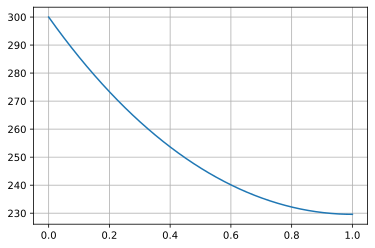

In [19]:
n = 200 # number of desired grid points
L = 1.0 # rod length
Tleft = 300
Tright = 300
Tinf = 100
h = 1 # heat transfer coefficient, due to advection of surrounding air
beta = 0

x = np.linspace(0,L,n) # create an array for the grid points x_i
dx = x[1] - x[0] # calculate grid spacing (grid spacing is constant here)

# create lower diagonal vector
ld = np.ones(n-1)
ld[-1] =2.0 # fix the end point

# create main diagonal vector
d = -(2.0 + dx*dx * h)*np.ones(n)
d[0] = 1.0 # fix the end point
# d[-1] = 1.0 # fix the end point

# create upper diagonal vector
ud = np.ones(n-1)
ud[0] = 0.0 # fix the end point

# combine those into a matrix
A = np.diag(ld,-1) + np.diag(d, 0) + np.diag(ud, 1)

# build the RHS array
rhs = -Tinf*dx*dx*h*np.ones(n)
rhs[0] = Tleft # fix the left boundary
rhs[-1] = -Tinf*dx*dx*h - 2.0*beta*dx # fix the right boundary

# solve the system of equations
sol = np.linalg.solve(A, rhs)

plt.plot(x, sol)
# plt.ylim([250,350])
plt.grid()

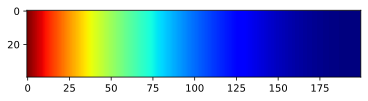

In [20]:
temperature = np.tile(sol,(40,1))
plt.imshow(temperature,cmap='jet')